<a href="https://colab.research.google.com/github/Saniru2006/Telco_Customer_Churn_2425606/blob/main/CM2604_2425606_ICW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Packages

In [1]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 8.5 MB/s eta 0:00:00


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from scipy import stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


# TASK 1: Exploratory Data Analysis

In [3]:
print("\nTASK 1: EXPLORATORY DATA ANALYSIS")

#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
print("\nLoading dataset...")
file_path = '/content/drive/MyDrive/Colab Notebooks/CM2604_ML_ICW_Test/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Display basic information
print("\nDataset preview:")
display(df.head())
print(f"\nDataset info:")
df.info()


TASK 1: EXPLORATORY DATA ANALYSIS
Mounted at /content/drive

Loading dataset...
Dataset loaded: 7043 rows, 21 columns

Dataset preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

## Data Quality Check

In [4]:
print("\n1.1 DATA QUALITY CHECK")

# Check for missing values
print("\nMissing values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check constant columns
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
if constant_cols:
    print(f"\nConstant columns: {constant_cols}")
else:
    print("\nNo constant columns found")


1.1 DATA QUALITY CHECK

Missing values:
Series([], dtype: int64)

Duplicate rows: 0

Data types:
object     18
int64       2
float64     1
Name: count, dtype: int64

No constant columns found


## Data Cleaning

In [5]:
print("\n1.2 DATA CLEANING")

df_clean = df.copy()

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
missing_after = df_clean['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges after conversion: {missing_after}")

# Fill missing TotalCharges with 0
df_clean['TotalCharges'].fillna(0, inplace=True)
print("Missing values filled with 0")

# Remove customerID for privacy
df_clean = df_clean.drop('customerID', axis=1)
print("customerID column removed")

print(f"\nCleaned dataset shape: {df_clean.shape}")


1.2 DATA CLEANING
Missing values in TotalCharges after conversion: 11
Missing values filled with 0
customerID column removed

Cleaned dataset shape: (7043, 20)


## Target Variable Analysis


1.3 TARGET VARIABLE ANALYSIS (CHURN)
Churn Distribution:
 No Churn:  5,174 (73.5%)
 Churn:  1,869 (26.5%)
 Baseline Accuracy: 73.5%


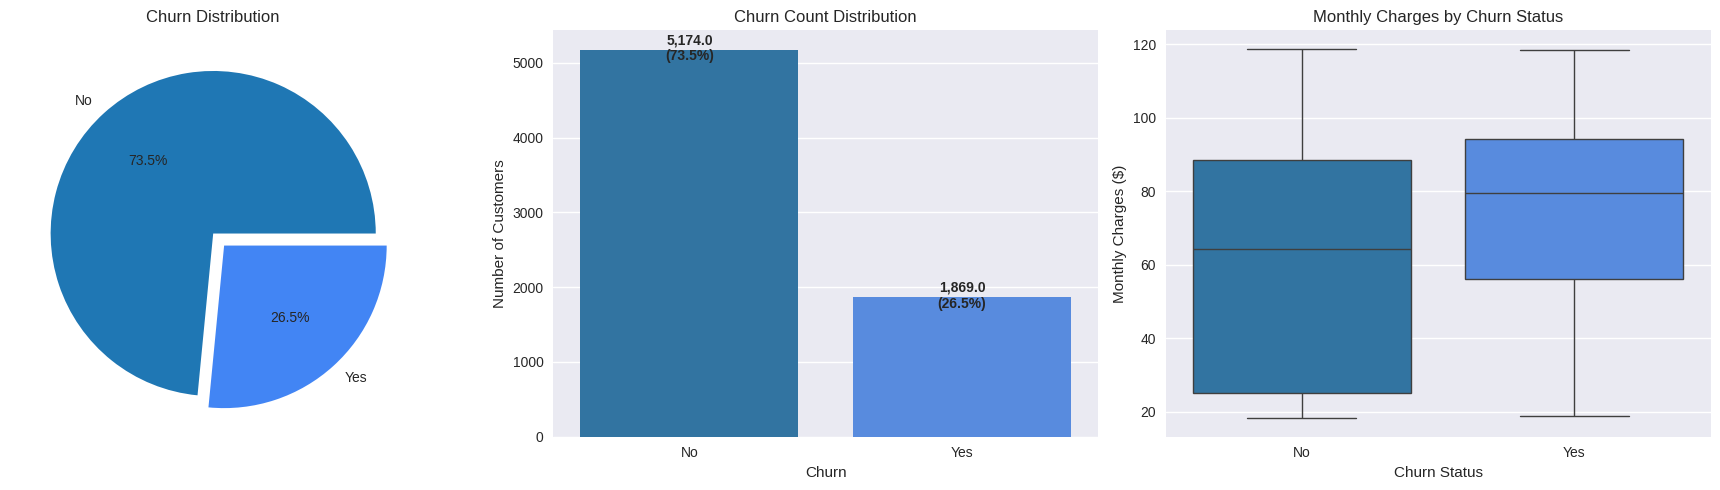

In [6]:
print("\n1.3 TARGET VARIABLE ANALYSIS (CHURN)")

churn_counts = df_clean['Churn'].value_counts()
churn_percentage = df_clean['Churn'].value_counts(normalize=True) * 100

print(f"Churn Distribution:")
print(f" No Churn: {churn_counts['No']:>6,} ({churn_percentage['No']:.1f}%)")
print(f" Churn: {churn_counts['Yes']:>6,} ({churn_percentage['Yes']:.1f}%)")
print(f" Baseline Accuracy: {churn_percentage['No']:.1f}%")

# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart
axes[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#1f77b4','#4285f4'], explode=[0, 0.1])
axes[0].set_title('Churn Distribution')

# Bar chart
sns.countplot(data=df_clean, x='Churn', ax=axes[1], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
axes[1].set_title('Churn Count Distribution')
axes[1].set_ylabel('Number of Customers')
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width()/2., p.get_height() + 20,
                f'{p.get_height():,}\n({p.get_height()/len(df_clean)*100:.1f}%)',
                ha='center', va='center', fontweight='bold')

# Monthly Charges by Churn Status (Box plot)
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', ax=axes[2], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
axes[2].set_title('Monthly Charges by Churn Status')
axes[2].set_xlabel('Churn Status')
axes[2].set_ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

## Outlier Detection


1.4 OUTLIER DETECTION
Outliers Analysis (IQR Method):
  tenure: 0 outliers (0.00%)
  MonthlyCharges: 0 outliers (0.00%)
  TotalCharges: 0 outliers (0.00%)


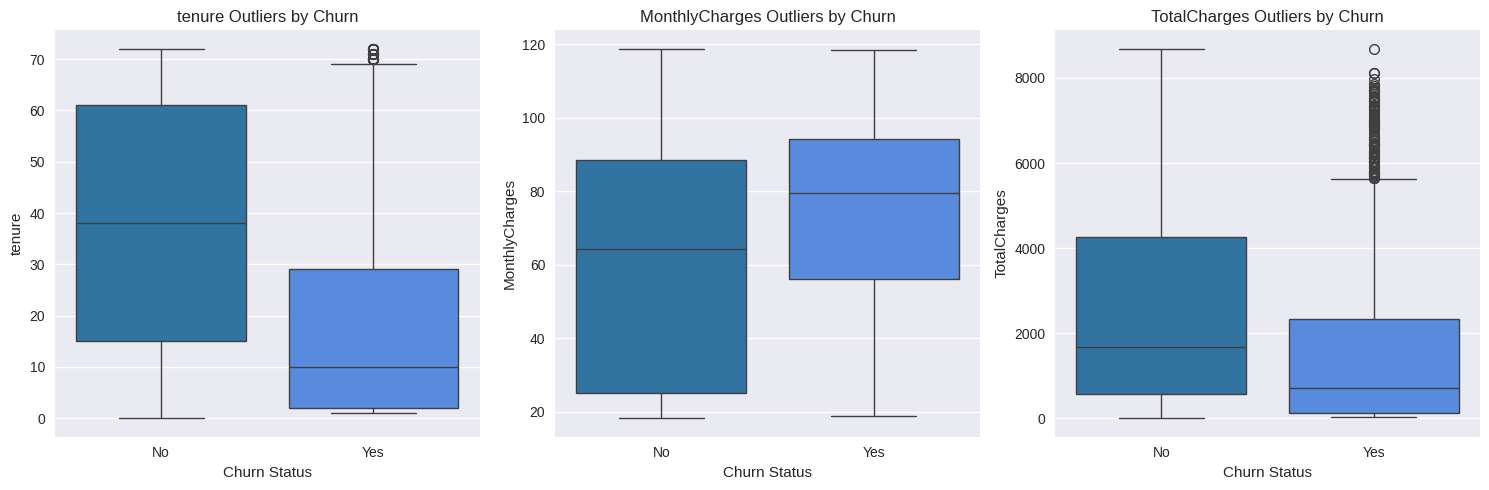

In [7]:
print("\n1.4 OUTLIER DETECTION")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("Outliers Analysis (IQR Method):")

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")

# Box plots for outlier visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_clean, x='Churn', y=col, ax=axes[i], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
    axes[i].set_title(f'{col} Outliers by Churn')
    axes[i].set_xlabel('Churn Status')
plt.tight_layout()
plt.show()

## Numerical Variable Analysis


1.4 NUMERICAL VARIABLES ANALYSIS
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']

Statistical summary:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


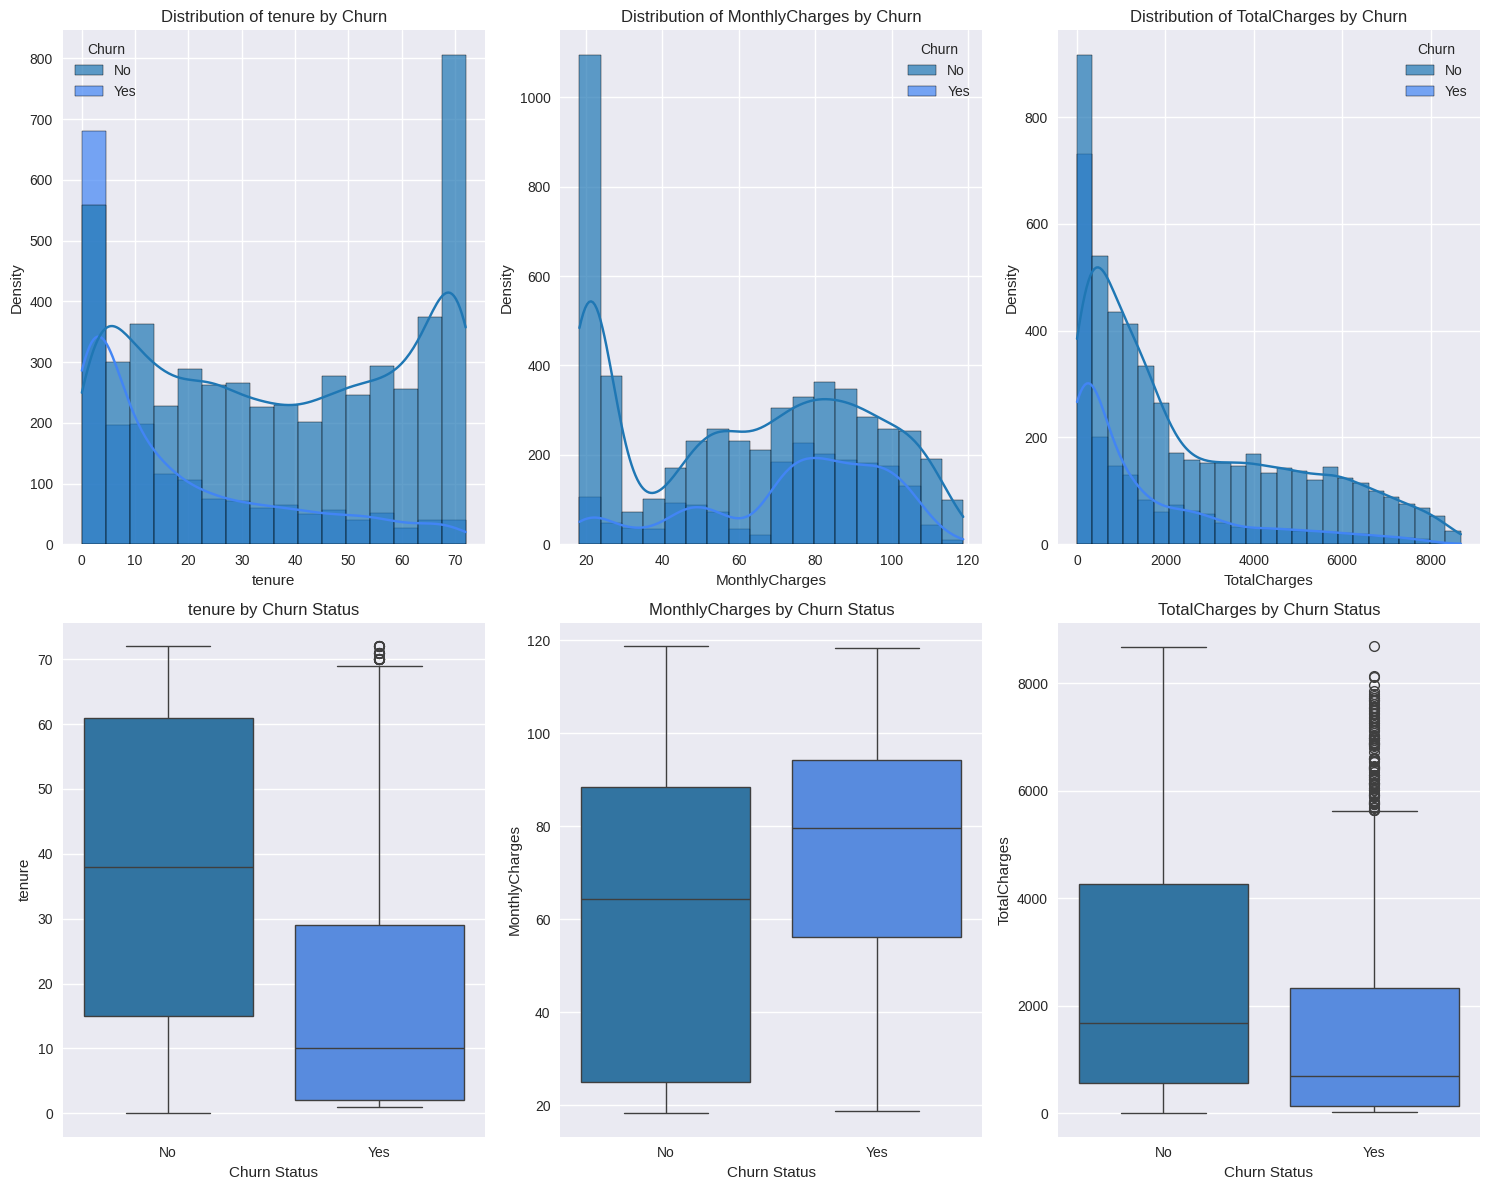


Pairplot of numerical features:


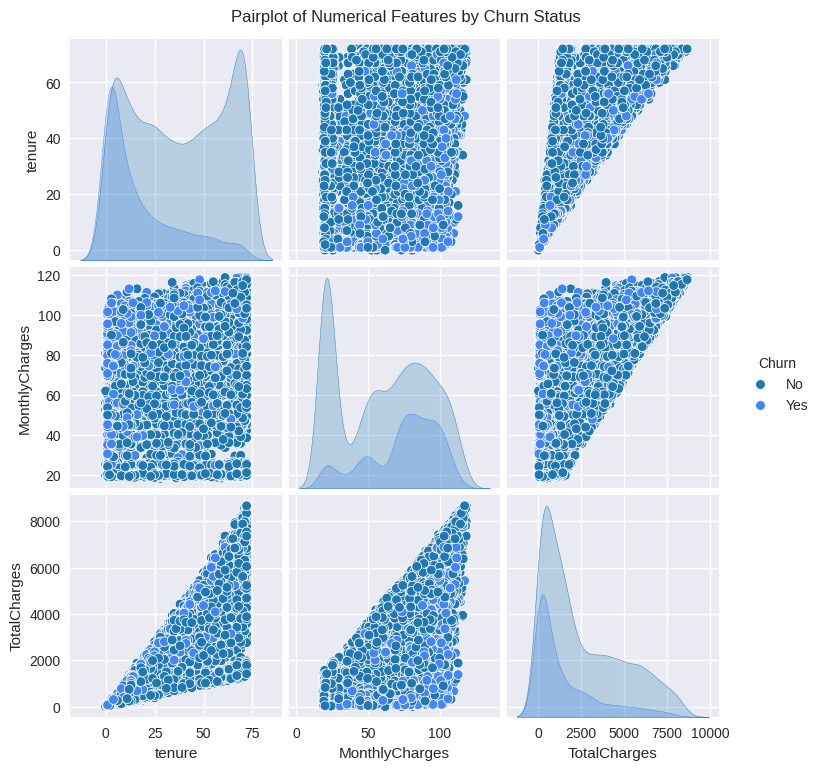


Statistical significance tests:

TENURE Statistics by Churn:
        mean  median    std  min  max
Churn                                
No     37.57    38.0  24.11    0   72
Yes    17.98    10.0  19.53    1   72
  T-statistic: -34.824, P-value: 0.0000
  Significant difference (p < 0.05)

MONTHLYCHARGES Statistics by Churn:
        mean  median    std    min     max
Churn                                     
No     61.27   64.43  31.09  18.25  118.75
Yes    74.44   79.65  24.67  18.85  118.35
  T-statistic: 18.408, P-value: 0.0000
  Significant difference (p < 0.05)

TOTALCHARGES Statistics by Churn:
          mean   median      std    min      max
Churn                                           
No     2549.91  1679.52  2329.95   0.00  8672.45
Yes    1531.80   703.55  1890.82  18.85  8684.80
  T-statistic: -18.707, P-value: 0.0000
  Significant difference (p < 0.05)


In [9]:
print("\n1.4 NUMERICAL VARIABLES ANALYSIS")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"Numerical columns: {numerical_cols}")

print("\nStatistical summary:")
display(df_clean[numerical_cols].describe())

# Distribution with churn hue
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Row 1: Histograms with KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_clean, x=col, hue='Churn', kde=True,
                 ax=axes[0,i], palette={'No': '#1f77b4', 'Yes': '#4285f4'}, alpha=0.7)
    axes[0,i].set_title(f'Distribution of {col} by Churn')
    axes[0,i].set_xlabel(col)
    axes[0,i].set_ylabel('Density')

# Row 2: Box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_clean, x='Churn', y=col,
                ax=axes[1,i], palette={'No': '#1f77b4', 'Yes': '#4285f4'})
    axes[1,i].set_title(f'{col} by Churn Status')
    axes[1,i].set_xlabel('Churn Status')
    axes[1,i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Pairplot
print("\nPairplot of numerical features:")
sns.pairplot(df_clean, hue='Churn', vars=numerical_cols, palette={'No': '#1f77b4', 'Yes': '#4285f4'})
plt.suptitle('Pairplot of Numerical Features by Churn Status', y=1.02)
plt.show()

# Statistical tests
# Statistical tests
print("\nStatistical significance tests:")
for col in numerical_cols:
    churn_yes = df_clean[df_clean['Churn'] == 'Yes'][col]
    churn_no = df_clean[df_clean['Churn'] == 'No'][col]

    # Calculate statistics
    stats_df = df_clean.groupby('Churn')[col].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
    print(f"\n{col.upper()} Statistics by Churn:")
    print(stats_df)

    # T-test
    t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Significant difference (p < 0.05)")
    else:
        print("  No significant difference")

## Categorical Variable Analysis


1.6 CATEGORICAL VARIABLES ANALYSIS
Number of categorical variables: 16


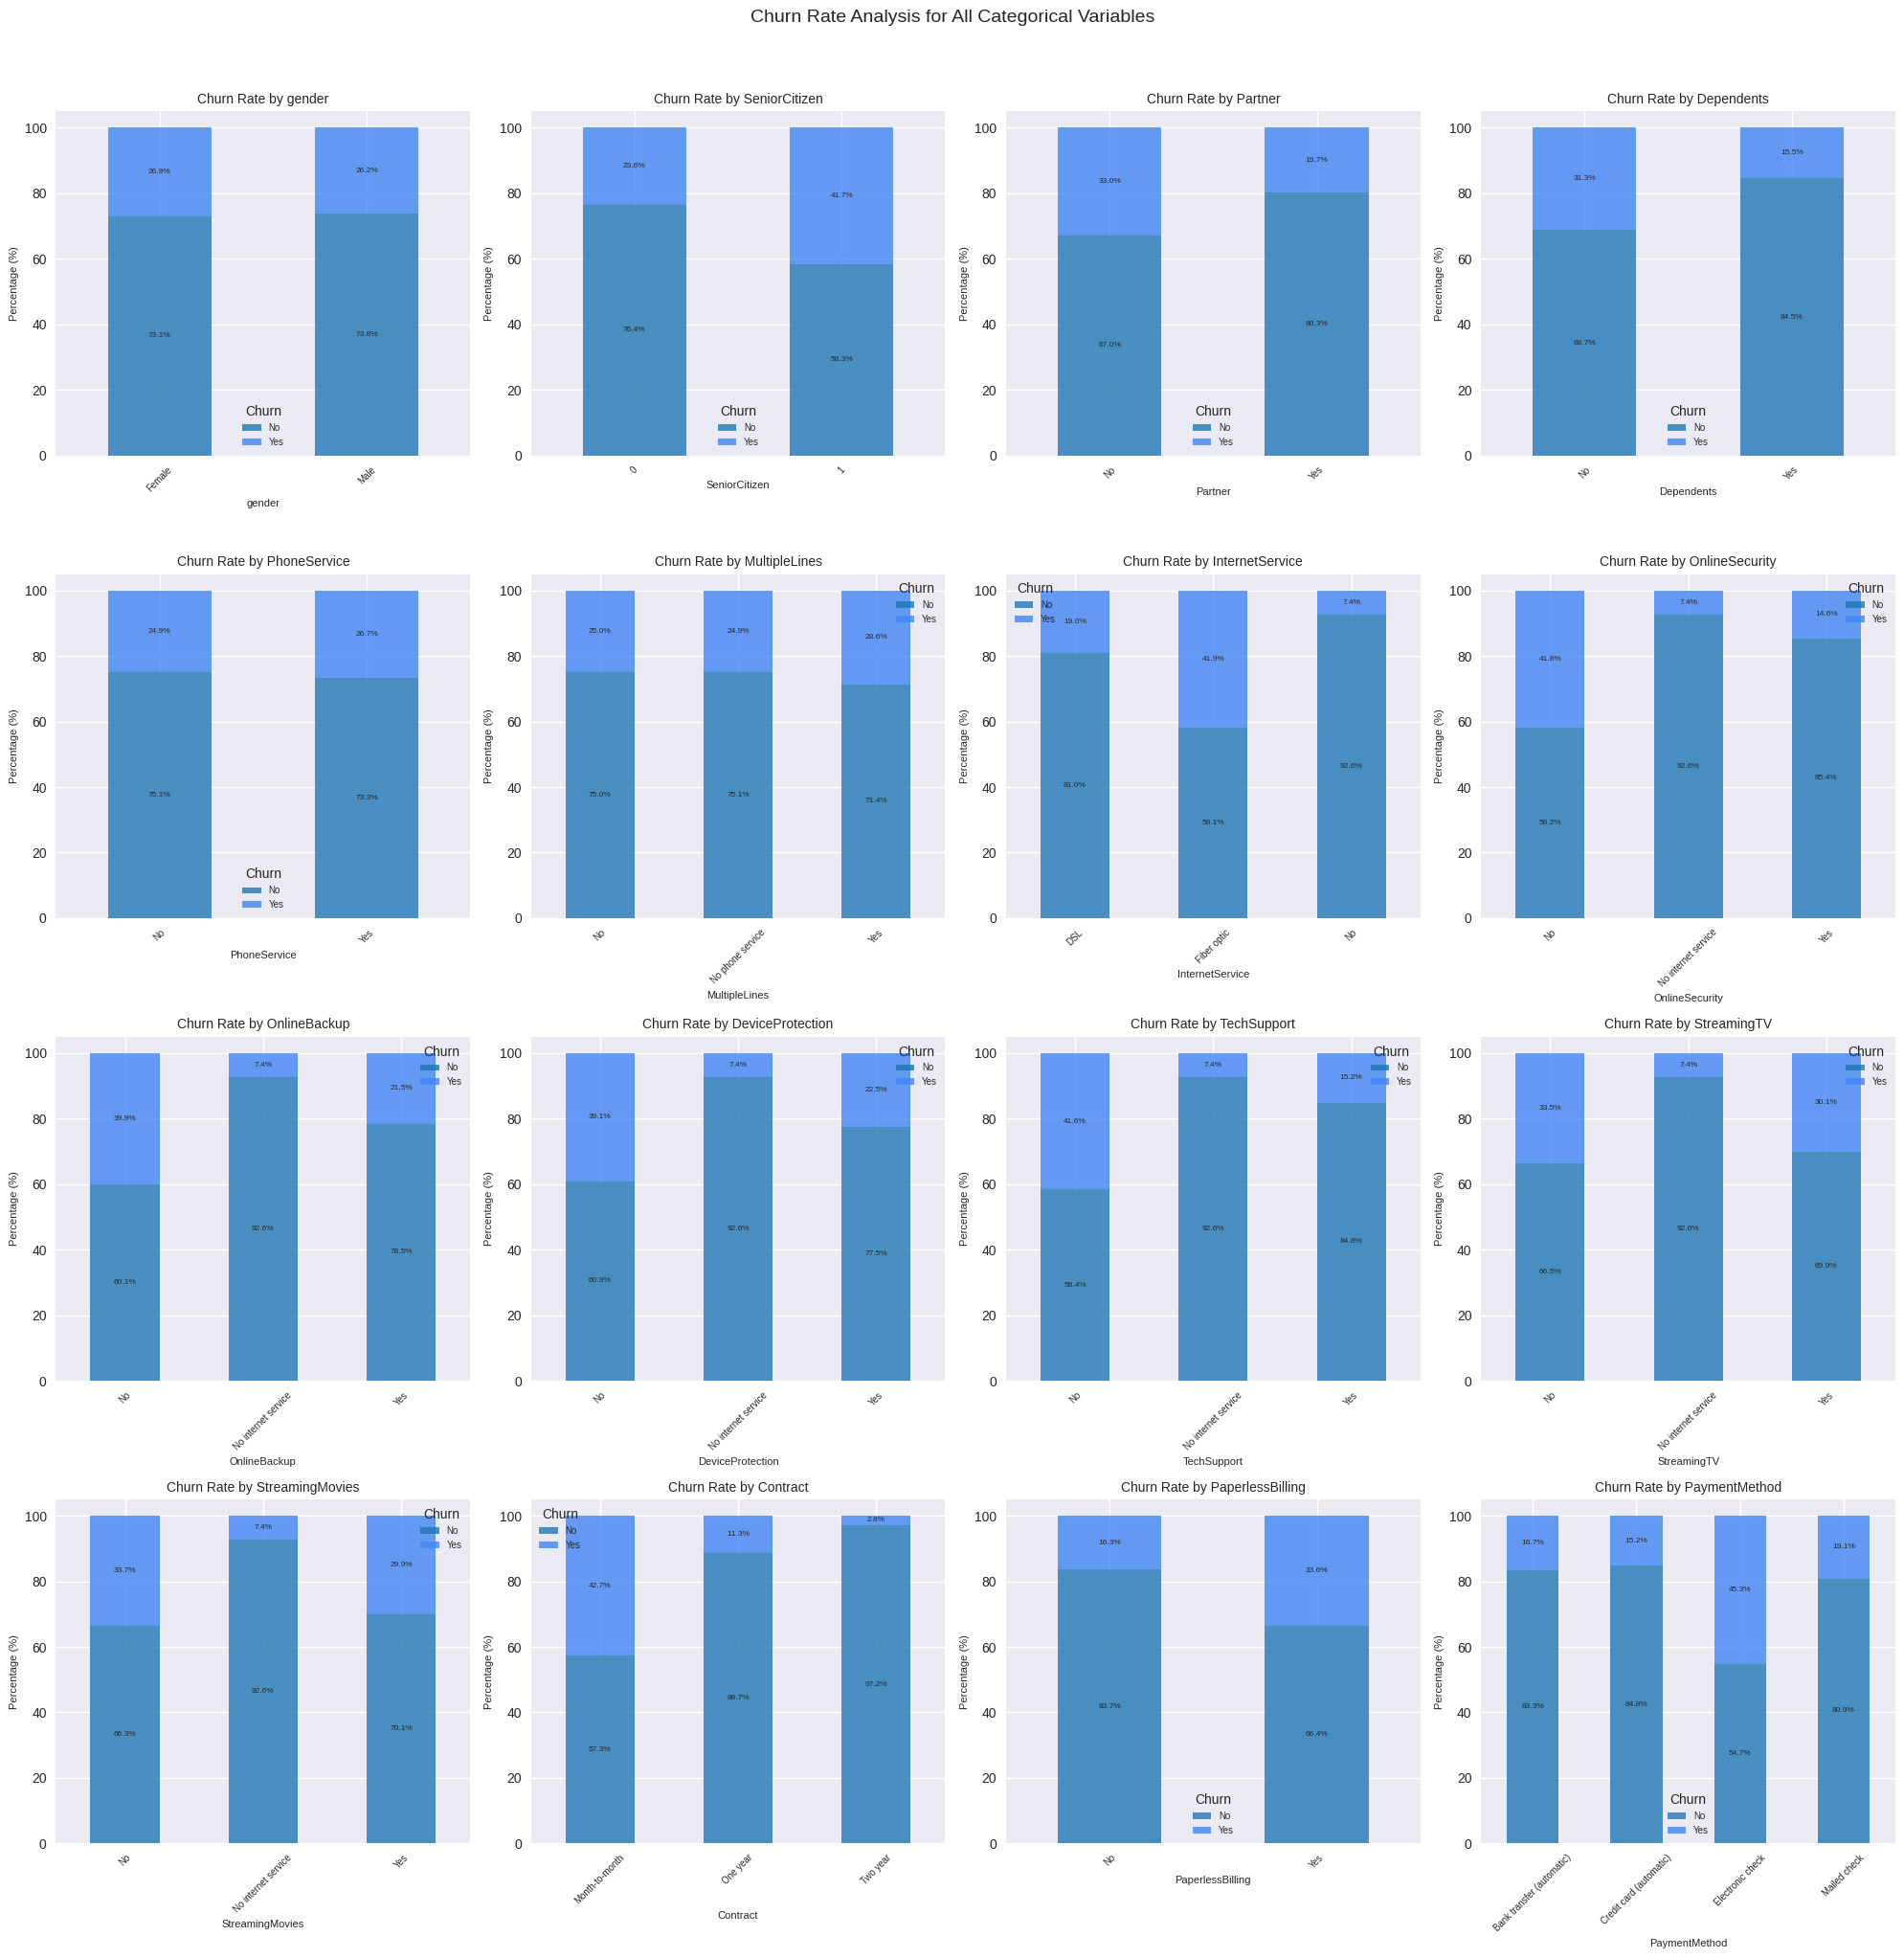


Key insights from categorical analysis:

Contract:
  Highest Risk: Month-to-month (42.7% churn)
  Lowest Risk: Two year (2.8% churn)
  Risk Difference: 39.9%

InternetService:
  Highest Risk: Fiber optic (41.9% churn)
  Lowest Risk: No (7.4% churn)
  Risk Difference: 34.5%

PaymentMethod:
  Highest Risk: Electronic check (45.3% churn)
  Lowest Risk: Credit card (automatic) (15.2% churn)
  Risk Difference: 30.0%

TechSupport:
  Highest Risk: No (41.6% churn)
  Lowest Risk: No internet service (7.4% churn)
  Risk Difference: 34.2%

OnlineSecurity:
  Highest Risk: No (41.8% churn)
  Lowest Risk: No internet service (7.4% churn)
  Risk Difference: 34.4%

SeniorCitizen:
  Highest Risk: 1 (41.7% churn)
  Lowest Risk: 0 (23.6% churn)
  Risk Difference: 18.1%

Senior Citizen Special Analysis:
  Non-Senior Citizens (0): 23.6% churn rate
  Senior Citizens (1): 41.7% churn rate
  Seniors are 1.8x more likely to churn


In [10]:
print("\n1.6 CATEGORICAL VARIABLES ANALYSIS")

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

print(f"Number of categorical variables: {len(categorical_cols)}")

# Analyze all categorical variables with churn rate
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Create cross tabulation for churn rate
    cross_tab = pd.crosstab(df_clean[col], df_clean['Churn'], normalize='index') * 100

    # Plot stacked bar chart
    bars = cross_tab.plot(kind='bar', ax=axes[i], stacked=True,
                         color=['#1f77b4','#4285f4'], alpha=0.8)
    axes[i].set_title(f'Churn Rate by {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Percentage (%)', fontsize=8)
    axes[i].tick_params(axis='x', rotation=45, labelsize=7)
    axes[i].legend(title='Churn', fontsize=7)

    # Add percentage annotations
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6)

plt.suptitle('Churn Rate Analysis for All Categorical Variables', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Key insights from categorical analysis
print("\nKey insights from categorical analysis:")
key_categories = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'SeniorCitizen']

for var in key_categories:
    churn_rates = df_clean.groupby(var)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    max_churn_category = churn_rates.idxmax()
    max_churn_rate = churn_rates.max()
    min_churn_category = churn_rates.idxmin()
    min_churn_rate = churn_rates.min()

    print(f"\n{var}:")
    print(f"  Highest Risk: {max_churn_category} ({max_churn_rate:.1f}% churn)")
    print(f"  Lowest Risk: {min_churn_category} ({min_churn_rate:.1f}% churn)")
    print(f"  Risk Difference: {max_churn_rate - min_churn_rate:.1f}%")

# Special analysis for Senior Citizens
print("\nSenior Citizen Special Analysis:")
if 'SeniorCitizen' in df_clean.columns:
    senior_churn_rates = df_clean.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    print(f"  Non-Senior Citizens (0): {senior_churn_rates[0]:.1f}% churn rate")
    print(f"  Senior Citizens (1): {senior_churn_rates[1]:.1f}% churn rate")
    print(f"  Seniors are {senior_churn_rates[1]/senior_churn_rates[0]:.1f}x more likely to churn")

## Correlation Analysis


1.6 CORRELATION ANALYSIS

Top features correlated with churn:
2. MonthlyCharges         0.193 (increases churn)
3. PaperlessBilling       0.192 (increases churn)
4. SeniorCitizen          0.151 (increases churn)
5. PaymentMethod          0.107 (increases churn)
6. MultipleLines          0.038 (increases churn)


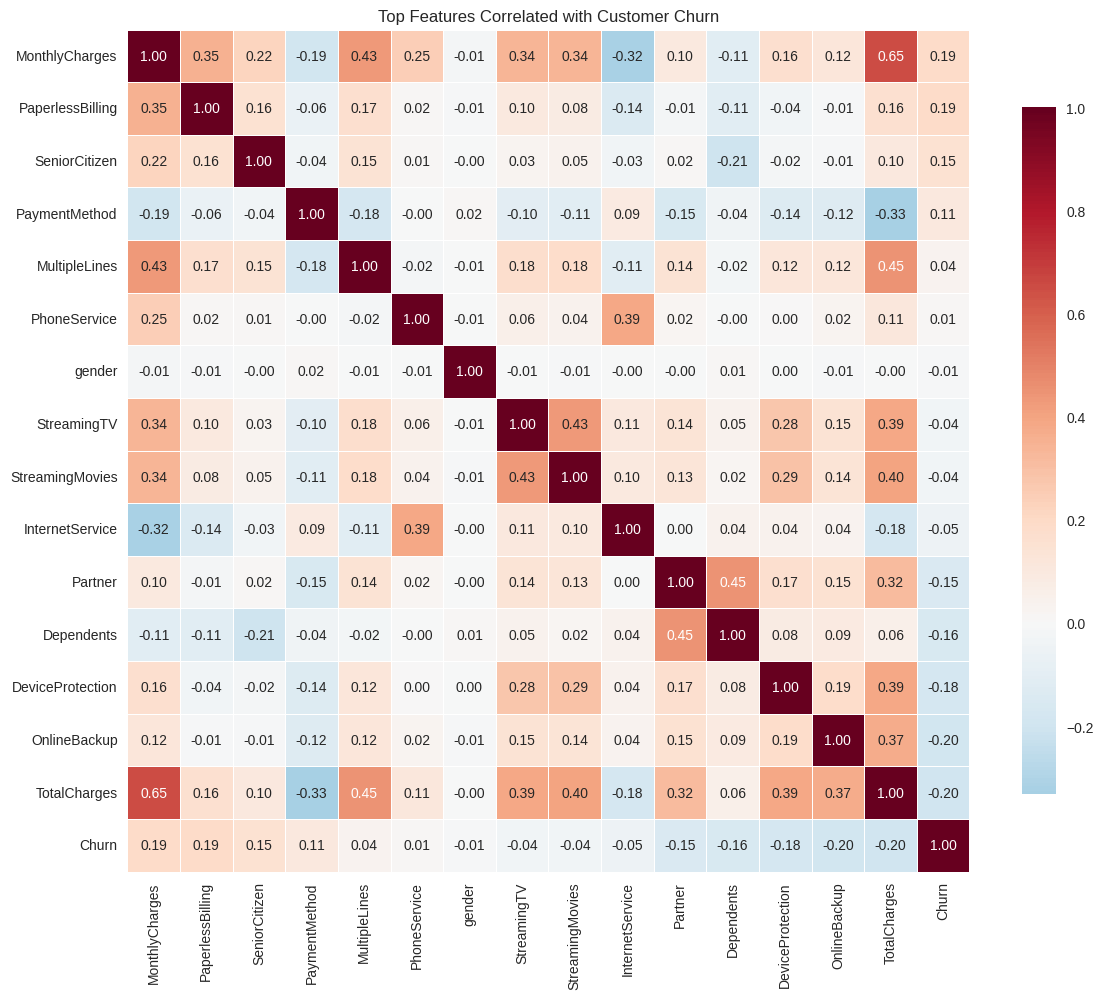

In [11]:
print("\n1.6 CORRELATION ANALYSIS")

# Prepare data for correlation
df_corr = df_clean.copy()

# Encode categorical variables for correlation
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Encode target
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Calculate correlation
correlation_matrix = df_corr.corr()
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

print("\nTop features correlated with churn:")
for i, (feature, corr) in enumerate(churn_correlations.head(6).items()):
    if feature != 'Churn':
        direction = "increases" if corr > 0 else "decreases"
        print(f"{i+1}. {feature:20} {corr:7.3f} ({direction} churn)")

# Heatmap
plt.figure(figsize=(12, 10))
top_features = churn_correlations.drop('Churn').head(15).index.tolist()
top_features.append('Churn')
focused_corr = correlation_matrix.loc[top_features, top_features]

sns.heatmap(focused_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Top Features Correlated with Customer Churn')
plt.tight_layout()
plt.show()

# TASK 2: Model Development

In [12]:
print("\nTASK 2: MODEL DEVELOPMENT")


TASK 2: MODEL DEVELOPMENT


## Data Preparation

In [14]:
print("\n2.1 DATA PREPARATION FOR MODELING")

df_model = df_clean.copy()

# Encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
label_encoder = LabelEncoder()

for col in binary_cols:
    df_model[col] = label_encoder.fit_transform(df_model[col])
    print(f"  {col}: {label_encoder.classes_} → {label_encoder.transform(label_encoder.classes_)}")


# One-hot encode multi-category columns
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
'Contract', 'PaymentMethod']

df_model = pd.get_dummies(df_model, columns=multi_cat_cols, drop_first=True)
print(f"  One-hot encoded {len(multi_cat_cols)} multi-category columns")

# Encode target variable
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})
print(f"\nDataset shape after preprocessing: {df_model.shape}")

# Split features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"\nFeature matrix (X) shape: {X.shape}")
print(f"Target vector (y) shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain-Test Split Results:")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Training churn rate: {y_train.mean()*100:.1f}%")

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE:")
print(f" Class 0: {sum(y_train_res == 0):,} samples")
print(f" Class 1: {sum(y_train_res == 1):,} samples")
print(f" Synthetic samples created: {sum(y_train_res == 1) - sum(y_train == 1):,}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Keep unscaled for Decision Tree
X_train_unscaled = X_train_res
X_test_unscaled = X_test

print("\nFeature scaling completed")


2.1 DATA PREPARATION FOR MODELING
  gender: ['Female' 'Male'] → [0 1]
  Partner: ['No' 'Yes'] → [0 1]
  Dependents: ['No' 'Yes'] → [0 1]
  PhoneService: ['No' 'Yes'] → [0 1]
  PaperlessBilling: ['No' 'Yes'] → [0 1]
  One-hot encoded 10 multi-category columns

Dataset shape after preprocessing: (7043, 31)

Feature matrix (X) shape: (7043, 30)
Target vector (y) shape: (7043,)

Train-Test Split Results:
Training set: 5,634 samples
Test set: 1,409 samples
Training churn rate: 26.5%

After SMOTE:
 Class 0: 4,139 samples
 Class 1: 4,139 samples
 Synthetic samples created: 2,644

Feature scaling completed


## Model 1: Decision Tree

## Model 2: Neural Network

## Model Evaluation

## Model Comparison

##